Nama : GAVIRA OLIPA FLORINA


NIM : 09011181823017

SK5A INDRALAYA

In [1]:
# Impor semua fungsi yang diperlukan untuk notebook
import csv
from random import randrange
from random import random
from random import seed
from math import sqrt
from math import exp
from math import tanh

In [2]:
##### Loading,dan konversi file CSV #####

## Load  file CSV
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

## Ubah kolom string menjadi float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

## Ubah kolom string menjadi integer
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup


##### Normalize Data ###########

# Temukan nilai min dan max untuk setiap kolom

def dataset_minmax(dataset):
    minmax = list()
    for i in range(len(dataset[0])):
        colvalues = [row[i] for row in dataset]
        min_value = min(colvalues) 
        max_value = max(colvalues)
        minmax.append([min_value, max_value])
    return minmax

# Normalisasi set data kecuali baris terakhir untuk nilai klasifikasi
def Normalize_Dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)-1):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

In [3]:
#### Pisahkan dataset menjadi lipatan k dan prosedur algoritma

# Pisahkan kumpulan data menjadi $ k $ lipatan
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

#Evaluasi algoritme menggunakan cross-validation split
def evaluate_algorithm_cv(dataset, algorithm, n_folds, performance_assessment, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        performance = performance_assessment(actual, predicted)
        scores.append(performance)
    return scores

In [4]:
#### Performance measure #####

# Dapatkan akurasi prediksi #
def getAccuracy(actual,predicted):
    correct = 0
    for x in range(len(actual)):
        if actual[x] == predicted[x]:
            correct += 1
    return correct / float(len(actual)) * 100.00

## Training the Network
Training terdiri dari:
1. forward propagating fitur input melalui network
2. Calculate error antara prediksi yang dibuat jaringan dan target sebenarnya
3. Back-propagating error melalui network untuk menyesuaikan bobot.


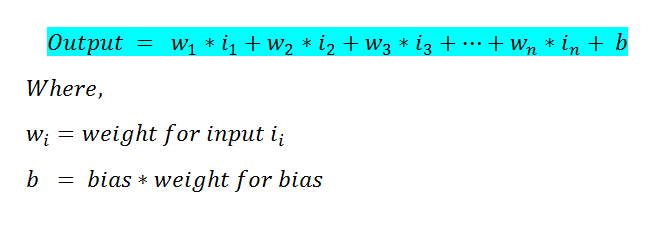

## Sigmoid Function
Fungsi sigmoid berfungsi sebagai fungsi aktivasi dalam pelatihan jaringan saraf kami. Kami biasanya menggunakan jaringan saraf untuk klasifikasi. Dalam klasifikasi biner, kami memiliki 2 jenis. Namun, seperti yang bisa kita lihat, nilai keluaran kita bisa berupa angka berapa pun dari persamaan yang kita gunakan. Untuk mengatasi masalah tersebut, kami menggunakan fungsi sigmoid. Sekarang untuk klasifikasi, kita ingin nilai keluaran kita menjadi 0 atau 1. Jadi untuk mendapatkan nilai antara 0 dan 1 kita menggunakan fungsi sigmoid. Fungsi sigmoid mengubah nilai keluaran kita antara 0 dan 1.
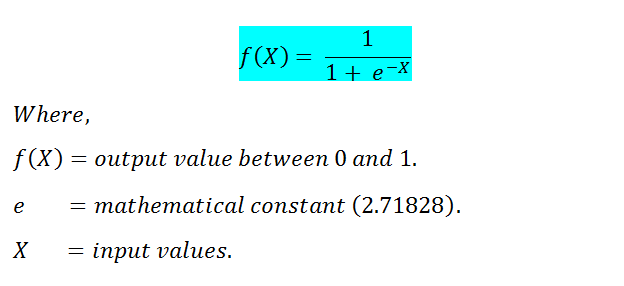

In [5]:
##### Backpropagation algorithm ######

# Inisialisasi ANN dengan beberapa hidden layers
def ini_network(n_inputs, n_hidden, n_outputs, added_sub_layers):
    network= list()
    hidden_layer_ini = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer_ini)
    for _ in range(added_sub_layers):
        hidden_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_hidden)]
        network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

# Hitung aktivasi neuron untuk input
def activate(weights, input):
    #Memilih baris bobot final untuk bias
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i]*input[i]
    return activation

#Transfer aktivasi neuron
def transfer(activation, functiontype):
    if functiontype == 'Exponential':
        return 1.0 / (1.0 + exp(-activation))
    elif functiontype == 'Tanh':
        return tanh(activation)

# Forward propagation dari input ke output network output
def forward_propagation(network, instance, activation_function):
    inputs = instance
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation, activation_function)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

# Hitung turunan keluaran neuron
def transfer_derivative(output, activation_function):
    if activation_function == 'Exponential':
        return output * (1.0 - output)
    elif activation_function == 'Tanh':
        return 1 - (tanh(output))**2

# Backpropagate error dan simpan di neuron
def backward_propagate_error(network, expected, activation_function):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i+1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
                neuron = layer[j]
                neuron['delta'] = errors[j] * transfer_derivative(neuron['output'], activation_function)


# Perbarui bobot jaringan dengan error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        #input all weights except last term which is the bias
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']

# Train network untuk fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs, activation_function):
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagation(network, row, activation_function)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected, activation_function)
            update_weights(network, row, l_rate)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))


# Buat prediksi dengan network
def predict(network, row, activation_function):
    outputs = forward_propagation(network, row, activation_function)
    return outputs.index(max(outputs))

# Backpropagation Algorithm dengan Stochastic Gradient Descent
def back_propagation_sgs(train, test, l_rate, n_epoch, n_hidden, added_sub_layers):
    n_inputs = len(train[0]) - 1
    n_outputs = len(set([row[-1] for row in train]))
    network = ini_network(n_inputs, n_hidden, n_outputs, added_sub_layers)
    train_network(network, train, l_rate, n_epoch, n_outputs, 'Exponential')
    predictions = list()
    for row in test:
        prediction = predict(network, row, 'Exponential')
        predictions.append(prediction)
    return(predictions)

In [6]:
###### Fungsi utama dijalankan pada seeds dataset #######

def main():
    # Uji Backprop pada dataset Seeds
    seed(1)
    # load dan prepare data
    filename = 'wheat_seeds.csv'
    dataset = load_csv(filename)
    for i in range(len(dataset[0])-1):
        str_column_to_float(dataset, i)
    # ubah kolom kelas menjadi integer
    str_column_to_int(dataset, len(dataset[0])-1)
    # menormalkan variabel input
    minmax = dataset_minmax(dataset)
    Normalize_Dataset(dataset, minmax)

    # evaluasi algoritma
    n_folds = 5 # nomor lipatan untuk validasi silang k kali lipat
    l_rate = 0.5 # kecepatan pembelajaran
    n_epoch = 100 # number of epochs
    n_hidden = 2# jumlah hidden node di hidden layers ANN
    num_added_hidden_layers = 0 # jumlah hidden layers yang ditambahkan (ke yang pertama)
    
    scores = evaluate_algorithm_cv(dataset, back_propagation_sgs, n_folds, getAccuracy,l_rate, n_epoch, n_hidden, num_added_hidden_layers)
    print('Scores: %s' % scores)
    print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

main()

>epoch=0, lrate=0.500, error=138.542
>epoch=1, lrate=0.500, error=116.509
>epoch=2, lrate=0.500, error=95.442
>epoch=3, lrate=0.500, error=80.719
>epoch=4, lrate=0.500, error=73.739
>epoch=5, lrate=0.500, error=69.835
>epoch=6, lrate=0.500, error=66.784
>epoch=7, lrate=0.500, error=63.507
>epoch=8, lrate=0.500, error=59.411
>epoch=9, lrate=0.500, error=54.373
>epoch=10, lrate=0.500, error=48.817
>epoch=11, lrate=0.500, error=43.492
>epoch=12, lrate=0.500, error=38.951
>epoch=13, lrate=0.500, error=35.339
>epoch=14, lrate=0.500, error=32.542
>epoch=15, lrate=0.500, error=30.377
>epoch=16, lrate=0.500, error=28.682
>epoch=17, lrate=0.500, error=27.330
>epoch=18, lrate=0.500, error=26.234
>epoch=19, lrate=0.500, error=25.330
>epoch=20, lrate=0.500, error=24.573
>epoch=21, lrate=0.500, error=23.931
>epoch=22, lrate=0.500, error=23.378
>epoch=23, lrate=0.500, error=22.898
>epoch=24, lrate=0.500, error=22.476
>epoch=25, lrate=0.500, error=22.103
>epoch=26, lrate=0.500, error=21.769
>epoch=27

>epoch=22, lrate=0.500, error=23.804
>epoch=23, lrate=0.500, error=23.428
>epoch=24, lrate=0.500, error=23.088
>epoch=25, lrate=0.500, error=22.778
>epoch=26, lrate=0.500, error=22.494
>epoch=27, lrate=0.500, error=22.231
>epoch=28, lrate=0.500, error=21.988
>epoch=29, lrate=0.500, error=21.761
>epoch=30, lrate=0.500, error=21.550
>epoch=31, lrate=0.500, error=21.351
>epoch=32, lrate=0.500, error=21.164
>epoch=33, lrate=0.500, error=20.987
>epoch=34, lrate=0.500, error=20.820
>epoch=35, lrate=0.500, error=20.661
>epoch=36, lrate=0.500, error=20.509
>epoch=37, lrate=0.500, error=20.365
>epoch=38, lrate=0.500, error=20.227
>epoch=39, lrate=0.500, error=20.095
>epoch=40, lrate=0.500, error=19.967
>epoch=41, lrate=0.500, error=19.845
>epoch=42, lrate=0.500, error=19.727
>epoch=43, lrate=0.500, error=19.613
>epoch=44, lrate=0.500, error=19.503
>epoch=45, lrate=0.500, error=19.396
>epoch=46, lrate=0.500, error=19.292
>epoch=47, lrate=0.500, error=19.192
>epoch=48, lrate=0.500, error=19.094
>

>epoch=56, lrate=0.500, error=18.997
>epoch=57, lrate=0.500, error=18.922
>epoch=58, lrate=0.500, error=18.849
>epoch=59, lrate=0.500, error=18.777
>epoch=60, lrate=0.500, error=18.707
>epoch=61, lrate=0.500, error=18.637
>epoch=62, lrate=0.500, error=18.568
>epoch=63, lrate=0.500, error=18.500
>epoch=64, lrate=0.500, error=18.433
>epoch=65, lrate=0.500, error=18.367
>epoch=66, lrate=0.500, error=18.301
>epoch=67, lrate=0.500, error=18.236
>epoch=68, lrate=0.500, error=18.172
>epoch=69, lrate=0.500, error=18.108
>epoch=70, lrate=0.500, error=18.045
>epoch=71, lrate=0.500, error=17.983
>epoch=72, lrate=0.500, error=17.921
>epoch=73, lrate=0.500, error=17.859
>epoch=74, lrate=0.500, error=17.798
>epoch=75, lrate=0.500, error=17.738
>epoch=76, lrate=0.500, error=17.678
>epoch=77, lrate=0.500, error=17.618
>epoch=78, lrate=0.500, error=17.559
>epoch=79, lrate=0.500, error=17.501
>epoch=80, lrate=0.500, error=17.442
>epoch=81, lrate=0.500, error=17.385
>epoch=82, lrate=0.500, error=17.328
>

>epoch=86, lrate=0.500, error=14.818
>epoch=87, lrate=0.500, error=14.774
>epoch=88, lrate=0.500, error=14.732
>epoch=89, lrate=0.500, error=14.689
>epoch=90, lrate=0.500, error=14.647
>epoch=91, lrate=0.500, error=14.605
>epoch=92, lrate=0.500, error=14.564
>epoch=93, lrate=0.500, error=14.523
>epoch=94, lrate=0.500, error=14.482
>epoch=95, lrate=0.500, error=14.441
>epoch=96, lrate=0.500, error=14.401
>epoch=97, lrate=0.500, error=14.361
>epoch=98, lrate=0.500, error=14.321
>epoch=99, lrate=0.500, error=14.281
>epoch=0, lrate=0.500, error=137.910
>epoch=1, lrate=0.500, error=129.064
>epoch=2, lrate=0.500, error=124.075
>epoch=3, lrate=0.500, error=109.221
>epoch=4, lrate=0.500, error=87.985
>epoch=5, lrate=0.500, error=76.201
>epoch=6, lrate=0.500, error=70.695
>epoch=7, lrate=0.500, error=67.184
>epoch=8, lrate=0.500, error=63.736
>epoch=9, lrate=0.500, error=59.218
>epoch=10, lrate=0.500, error=53.458
>epoch=11, lrate=0.500, error=47.298
>epoch=12, lrate=0.500, error=41.792
>epoch=

>epoch=13, lrate=0.500, error=57.067
>epoch=14, lrate=0.500, error=51.198
>epoch=15, lrate=0.500, error=45.325
>epoch=16, lrate=0.500, error=40.317
>epoch=17, lrate=0.500, error=36.415
>epoch=18, lrate=0.500, error=33.473
>epoch=19, lrate=0.500, error=31.252
>epoch=20, lrate=0.500, error=29.547
>epoch=21, lrate=0.500, error=28.207
>epoch=22, lrate=0.500, error=27.128
>epoch=23, lrate=0.500, error=26.237
>epoch=24, lrate=0.500, error=25.485
>epoch=25, lrate=0.500, error=24.839
>epoch=26, lrate=0.500, error=24.273
>epoch=27, lrate=0.500, error=23.771
>epoch=28, lrate=0.500, error=23.320
>epoch=29, lrate=0.500, error=22.912
>epoch=30, lrate=0.500, error=22.538
>epoch=31, lrate=0.500, error=22.194
>epoch=32, lrate=0.500, error=21.876
>epoch=33, lrate=0.500, error=21.579
>epoch=34, lrate=0.500, error=21.301
>epoch=35, lrate=0.500, error=21.039
>epoch=36, lrate=0.500, error=20.791
>epoch=37, lrate=0.500, error=20.556
>epoch=38, lrate=0.500, error=20.331
>epoch=39, lrate=0.500, error=20.116
>